#Import data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
file_path = '/content/drive/MyDrive/dataset_tweet_sentimen_tayangan_tv1.csv'

# Load the file into a DataFrame
full_df = pd.read_csv(file_path)
full_df.sample(25)

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
324,325,positive,MataNajwaMetroTV,5,metro tv emang tv paling keren ya edukatif dan...
78,79,negative,HitamPutihTransTV,0,"Baby tatan nangis ngeliat daddy, @HitamPutihT7..."
352,353,negative,MataNajwaMetroTV,0,kata aneh lagi diacara mata najwa metrotv meng...
143,144,positive,IndonesiaLawyersClubTvOne,18,Jokowi ini org betul2 soleh.. hendropriyono #i...
164,165,negative,IndonesiaLawyersClubTvOne,0,Diracun dengan pujian.. #ILC
298,299,negative,KickAndyMetroTV,0,"coba pulang kerumah, mati. Ga ada yg urus. Mis..."
277,278,negative,KickAndyMetroTV,0,Apakah kamu bodoh? Tidak!.. Kamu di bodohi ole...
426,400,positive,IndonesiaLawyersClubTvOne,0,Rating Indonesia Lawyers Club TV One Langsung ...
383,384,negative,MataNajwaMetroTV,0,Miris liat pengaturan skor di sepakbola indone...
354,355,negative,MataNajwaMetroTV,3,"Laporkan metro tv ke kpi, metro itu stres mata..."


#EDA

In [3]:
df = pd.DataFrame(full_df[['Sentiment', 'Acara TV', 'Text Tweet']])

##Changing label into 0 and 1

In [4]:
df['Sentiment'] = df['Sentiment'].map({'negative': 0, 'positive': 1})

In [5]:
df

,Sentiment,Acara TV,Text Tweet
0,1,HitamPutihTransTV,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,1,HitamPutihTransTV,Selamat berbuka puasa Semoga amal ibadah hari ...
2,1,HitamPutihTransTV,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,1,HitamPutihTransTV,selamat ya mas @adietaufan masuk hitamputih
4,1,HitamPutihTransTV,Asiknya nonton Hitam Putih Trans7
...,...,...,...
475,0,MataNajwaMetroTV,Saya lebih suka acara berita lain daripada Mat...
476,0,MataNajwaMetroTV,Metro TV seharusnya tidak mendukung acara yang...
477,0,MataNajwaMetroTV,Saya tidak setuju dengan pendekatan yang diamb...
478,0,MataNajwaMetroTV,Najwa Shihab terlalu sering menyela pembicaraa...


##Word Cloud

In [6]:
!pip install wordcloud

38903


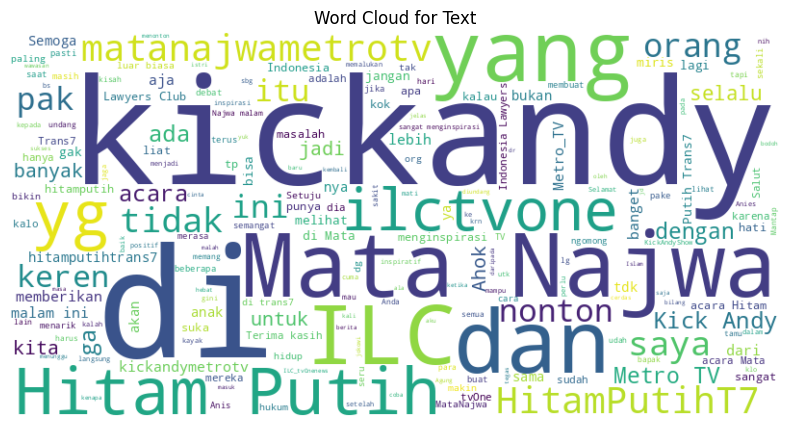

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all tweets into a single string
text = ' '.join(df['Text Tweet'])
print(len(text)) #banyak karakter
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text')
plt.show()

In [8]:
#df.to_csv('wikipedia-20000.csv', index=False)

#Text Preprocessing

##Case Folding

In [9]:
#To lower case
#We can do this by using a new dataframe to store the value.
import pandas as pd
df_lower = pd.DataFrame()

df_lower["Text Tweet"] = df["Text Tweet"].str.lower()

df_lower

,Text Tweet
0,"undang @n_shanijkt48 ke hitamputih, pemenang s..."
1,selamat berbuka puasa semoga amal ibadah hari ...
2,"ada nih di trans7 hitam putih, dia dpt penghar..."
3,selamat ya mas @adietaufan masuk hitamputih
4,asiknya nonton hitam putih trans7
...,...
475,saya lebih suka acara berita lain daripada mat...
476,metro tv seharusnya tidak mendukung acara yang...
477,saya tidak setuju dengan pendekatan yang diamb...
478,najwa shihab terlalu sering menyela pembicaraa...


##Link Removal

In [10]:
# Function to clean links from text
def clean_links(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')

    # Use the sub() function to replace URLs with an empty string
    return url_pattern.sub('', text)

df_cleaned = pd.DataFrame()


##Punctuation Removal

In [11]:
import re
# Define a function to remove punctuation and whitespaces
def remove_punctuation_and_whitespace(text):
    # Use regular expression to remove punctuation and whitespace
    cleaned_text = re.sub(r'[?(),.;:!$%^&*_-]', '', text)
    cleaned_text = re.sub(r'\d+', '', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    return cleaned_text

# Apply both functions to the 'Text Tweet' column
df_cleaned['Text Tweet'] = df_lower['Text Tweet'].apply(clean_links).apply(remove_punctuation_and_whitespace)

df_cleaned.head(10)

,Text Tweet
0,undang @nshanijkt ke hitamputih pemenang ssk j...
1,selamat berbuka puasa semoga amal ibadah hari ...
2,ada nih di trans hitam putih dia dpt pengharga...
3,selamat ya mas @adietaufan masuk hitamputih
4,asiknya nonton hitam putih trans
5,@trans acara paling komplit dan menarik apalag...
6,hitam putih t inspiratif banget
7,suka banget dengan acara hitam putih
8,keren lu bro #hitamputihtrans
9,tadi ada yg liat hitam putih di trans ga ada s...


##Stemming

In [12]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [13]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# df_stemming = pd.DataFrame()
# df_stemming["Text Tweet"] = df_cleaned["Text Tweet"].apply(lambda x: stemmer.stem(x))
# df_stemming.head(10)

##Stopword Removal

In [14]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stop_factory = StopWordRemoverFactory()
more_stopword = ["yg", "ga", "dgn", 'dg', 'tdk', 'kok', 'gak', 'nya', 'aja', 'lg']
stopwords = ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan', 'berkenaan', 'berlainan', 'berlalu', 'berlangsung', 'berlebihan', 'bermacam', 'bermacam-macam', 'bermaksud', 'bermula', 'bersama', 'bersama-sama', 'bersiap', 'bersiap-siap', 'bertanya', 'bertanya-tanya', 'berturut', 'berturut-turut', 'bertutur', 'berujar', 'berupa', 'besar', 'betul', 'betulkah', 'biasa', 'biasanya', 'bila', 'bilakah', 'bisa', 'bisakah', 'boleh', 'bolehkah', 'bolehlah', 'buat', 'bukan', 'bukankah', 'bukanlah', 'bukannya', 'bulan', 'bung', 'cara', 'caranya', 'cukup', 'cukupkah', 'cukuplah', 'cuma', 'dahulu', 'dalam', 'dan', 'dapat', 'dari', 'daripada', 'datang', 'dekat', 'demi', 'demikian', 'demikianlah', 'dengan', 'depan', 'di', 'dia', 'diakhiri', 'diakhirinya', 'dialah', 'diantara', 'diantaranya', 'diberi', 'diberikan', 'diberikannya', 'dibuat', 'dibuatnya', 'didapat', 'didatangkan', 'digunakan', 'diibaratkan', 'diibaratkannya', 'diingat', 'diingatkan', 'diinginkan', 'dijawab', 'dijelaskan', 'dijelaskannya', 'dikarenakan', 'dikatakan', 'dikatakannya', 'dikerjakan', 'diketahui', 'diketahuinya', 'dikira', 'dilakukan', 'dilalui', 'dilihat', 'dimaksud', 'dimaksudkan', 'dimaksudkannya', 'dimaksudnya', 'diminta', 'dimintai', 'dimisalkan', 'dimulai', 'dimulailah', 'dimulainya', 'dimungkinkan', 'dini', 'dipastikan', 'diperbuat', 'diperbuatnya', 'dipergunakan', 'diperkirakan', 'diperlihatkan', 'diperlukan', 'diperlukannya', 'dipersoalkan', 'dipertanyakan', 'dipunyai', 'diri', 'dirinya', 'disampaikan', 'disebut', 'disebutkan', 'disebutkannya', 'disini', 'disinilah', 'ditambahkan', 'ditandaskan', 'ditanya', 'ditanyai', 'ditanyakan', 'ditegaskan', 'ditujukan', 'ditunjuk', 'ditunjuki', 'ditunjukkan', 'ditunjukkannya', 'ditunjuknya', 'dituturkan', 'dituturkannya', 'diucapkan', 'diucapkannya', 'diungkapkan', 'dong', 'dua', 'dulu', 'empat', 'enggak', 'enggaknya', 'entah', 'entahlah', 'guna', 'gunakan', 'hal', 'hampir', 'hanya', 'hanyalah', 'hari', 'harus', 'haruslah', 'harusnya', 'hendak', 'hendaklah', 'hendaknya', 'hingga', 'ia', 'ialah', 'ibarat', 'ibaratkan', 'ibaratnya', 'ibu', 'ikut', 'ingat', 'ingat-ingat', 'ingin', 'inginkah', 'inginkan', 'ini', 'inikah', 'inilah', 'itu', 'itukah', 'itulah', 'jadi', 'jadilah', 'jadinya', 'jangan', 'jangankan', 'janganlah', 'jauh', 'jawab', 'jawaban', 'jawabnya', 'jelas', 'jelaskan', 'jelaslah', 'jelasnya', 'jika', 'jikalau', 'juga', 'jumlah', 'jumlahnya', 'justru', 'kala', 'kalau', 'kalaulah', 'kalaupun', 'kalian', 'kami', 'kamilah', 'kamu', 'kamulah', 'kan', 'kapan', 'kapankah', 'kapanpun', 'karena', 'karenanya', 'kasus', 'kata', 'katakan', 'katakanlah', 'katanya', 'ke', 'keadaan', 'kebetulan', 'kecil', 'kedua', 'keduanya', 'keinginan', 'kelamaan', 'kelihatan', 'kelihatannya', 'kelima', 'keluar', 'kembali', 'kemudian', 'kemungkinan', 'kemungkinannya', 'kenapa', 'kepada', 'kepadanya', 'kesampaian', 'keseluruhan', 'keseluruhannya', 'keterlaluan', 'ketika', 'khususnya', 'kini', 'kinilah', 'kira', 'kira-kira', 'kiranya', 'kita', 'kitalah', 'kok', 'kurang', 'lagi', 'lagian', 'lah', 'lain', 'lainnya', 'lalu', 'lama', 'lamanya', 'lanjut', 'lanjutnya', 'lebih', 'lewat', 'lima', 'luar', 'macam', 'maka', 'makanya', 'makin', 'malah', 'malahan', 'mampu', 'mampukah', 'mana', 'manakala', 'manalagi', 'masa', 'masalah', 'masalahnya', 'masih', 'masihkah', 'masing', 'masing-masing', 'mau', 'maupun', 'melainkan', 'melakukan', 'melalui', 'melihat', 'melihatnya', 'memang', 'memastikan', 'memberi', 'memberikan', 'membuat', 'memerlukan', 'memihak', 'meminta', 'memintakan', 'memisalkan', 'memperbuat', 'mempergunakan', 'memperkirakan', 'memperlihatkan', 'mempersiapkan', 'mempersoalkan', 'mempertanyakan', 'mempunyai', 'memulai', 'memungkinkan', 'menaiki', 'menambahkan', 'menandaskan', 'menanti', 'menanti-nanti', 'menantikan', 'menanya', 'menanyai', 'menanyakan', 'mendapat', 'mendapatkan', 'mendatang', 'mendatangi', 'mendatangkan', 'menegaskan', 'mengakhiri', 'mengapa', 'mengatakan', 'mengatakannya', 'mengenai', 'mengerjakan', 'mengetahui', 'menggunakan', 'menghendaki', 'mengibaratkan', 'mengibaratkannya', 'mengingat', 'mengingatkan', 'menginginkan', 'mengira', 'mengucapkan', 'mengucapkannya', 'mengungkapkan', 'menjadi', 'menjawab', 'menjelaskan', 'menuju', 'menunjuk', 'menunjuki', 'menunjukkan', 'menunjuknya', 'menurut', 'menuturkan', 'menyampaikan', 'menyangkut', 'menyatakan', 'menyebutkan', 'menyeluruh', 'menyiapkan', 'merasa', 'mereka', 'merekalah', 'merupakan', 'meski', 'meskipun', 'meyakini', 'meyakinkan', 'minta', 'mirip', 'misal', 'misalkan', 'misalnya', 'mula', 'mulai', 'mulailah', 'mulanya', 'mungkin', 'mungkinkah', 'nah', 'naik', 'namun', 'nanti', 'nantinya', 'nyaris', 'nyatanya', 'oleh', 'olehnya', 'pada', 'padahal', 'padanya', 'pak', 'paling', 'panjang', 'pantas', 'para', 'pasti', 'pastilah', 'penting', 'pentingnya', 'per', 'percuma', 'perlu', 'perlukah', 'perlunya', 'pernah', 'persoalan', 'pertama', 'pertama-tama', 'pertanyaan', 'pertanyakan', 'pihak', 'pihaknya', 'pukul', 'pula', 'pun', 'punya', 'rasa', 'rasanya', 'rata', 'rupanya', 'saat', 'saatnya', 'saja', 'sajalah', 'saling', 'sama', 'sama-sama', 'sambil', 'sampai', 'sampai-sampai', 'sampaikan', 'sana', 'sangat', 'sangatlah', 'satu', 'saya', 'sayalah', 'se', 'sebab', 'sebabnya', 'sebagai', 'sebagaimana', 'sebagainya', 'sebagian', 'sebaik', 'sebaik-baiknya', 'sebaiknya', 'sebaliknya', 'sebanyak', 'sebegini', 'sebegitu', 'sebelum', 'sebelumnya', 'sebenarnya', 'seberapa', 'sebesar', 'sebetulnya', 'sebisanya', 'sebuah', 'sebut', 'sebutlah', 'sebutnya', 'secara', 'secukupnya', 'sedang', 'sedangkan', 'sedemikian', 'sedikit', 'sedikitnya', 'seenaknya', 'segala', 'segalanya', 'segera', 'seharusnya', 'sehingga', 'seingat', 'sejak', 'sejauh', 'sejenak', 'sejumlah', 'sekadar', 'sekadarnya', 'sekali', 'sekali-kali', 'sekalian', 'sekaligus', 'sekalipun', 'sekarang', 'sekecil', 'seketika', 'sekiranya', 'sekitar', 'sekitarnya', 'sekurang-kurangnya', 'sekurangnya', 'sela', 'selagi', 'selain', 'selaku', 'selalu', 'selama', 'selama-lamanya', 'selamanya', 'selanjutnya', 'seluruh', 'seluruhnya', 'semacam', 'semakin', 'semampu', 'semampunya', 'semasa', 'semasih', 'semata', 'semata-mata', 'semaunya', 'sementara', 'semisal', 'semisalnya', 'sempat', 'semua', 'semuanya', 'semula', 'sendiri', 'sendirian', 'sendirinya', 'seolah', 'seolah-olah', 'seorang', 'sepanjang', 'sepantasnya', 'sepantasnyalah', 'seperlunya', 'seperti', 'sepertinya', 'sepihak', 'sering', 'seringnya', 'serta', 'serupa', 'sesaat', 'sesama', 'sesampai', 'sesegera', 'sesekali', 'seseorang', 'sesuatu', 'sesuatunya', 'sesudah', 'sesudahnya', 'setelah', 'setempat', 'setengah', 'seterusnya', 'setiap', 'setiba', 'setibanya', 'setidak-tidaknya', 'setidaknya', 'setinggi', 'seusai', 'sewaktu', 'siap', 'siapa', 'siapakah', 'siapapun', 'sini', 'sinilah', 'soal', 'soalnya', 'suatu', 'sudah', 'sudahkah', 'sudahlah', 'supaya', 'tadi', 'tadinya', 'tahu', 'tahun', 'tak', 'tambah', 'tambahnya', 'tampak', 'tampaknya', 'tandas', 'tandasnya', 'tanpa', 'tanya', 'tanyakan', 'tanyanya', 'tapi', 'tegas', 'tegasnya', 'telah', 'tempat', 'tengah', 'tentang', 'tentu', 'tentulah', 'tentunya', 'tepat', 'terakhir', 'terasa', 'terbanyak', 'terdahulu', 'terdapat', 'terdiri', 'terhadap', 'terhadapnya', 'teringat', 'teringat-ingat', 'terjadi', 'terjadilah', 'terjadinya', 'terkira', 'terlalu', 'terlebih', 'terlihat', 'termasuk', 'ternyata', 'tersampaikan', 'tersebut', 'tersebutlah', 'tertentu', 'tertuju', 'terus', 'terutama', 'tetap', 'tetapi', 'tiap', 'tiba', 'tiba-tiba', 'tidak', 'tidakkah', 'tidaklah', 'tiga', 'tinggi', 'toh', 'tunjuk', 'turut', 'tutur', 'tuturnya', 'ucap', 'ucapnya', 'ujar', 'ujarnya', 'umum', 'umumnya', 'ungkap', 'ungkapnya', 'untuk', 'usah', 'usai', 'waduh', 'wah', 'wahai', 'waktu', 'waktunya', 'walau', 'walaupun', 'wong', 'yaitu', 'yakin', 'yakni', 'yang']
stopwords = stop_factory.get_stop_words() + more_stopword + stopwords

remover = stop_factory.create_stop_word_remover()

df_stopword = pd.DataFrame()

# Ini yang tanpa stemming
df_stopword["Text Tweet"] = df_cleaned["Text Tweet"].apply(
    lambda text: " ".join([word for word in text.split() if word not in stopwords])
)

# # Ini yang dengan stemming
# df_stopword["Text Tweet"] = df_stemming["Text Tweet"].apply(
#     lambda text: " ".join([word for word in text.split() if word not in stopwords])
# )

df_stopword['Sentiment'] = df['Sentiment']

df_stopword

,Text Tweet,Sentiment
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1
1,selamat berbuka puasa semoga amal ibadah ni di...,1
2,nih trans hitam putih dpt penghargaan norwegia...,1
3,selamat mas @adietaufan masuk hitamputih,1
4,asiknya nonton hitam putih trans,1
...,...,...
475,suka acara berita mata najwa metro tv,0
476,metro tv mendukung acara memprovokasi mata najwa,0
477,setuju pendekatan diambil mata najwa malam,0
478,najwa shihab menyela pembicaraan mata najwa,0


27675


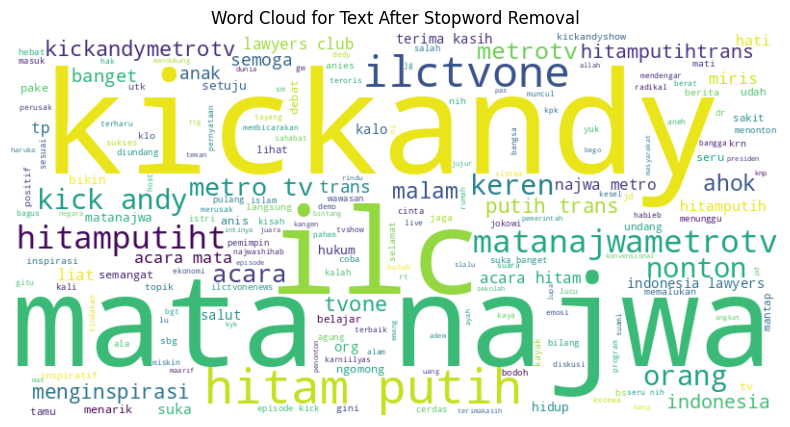

In [15]:
# Combine all tweets into a single string
text = ' '.join(df_stopword['Text Tweet'])
print(len(text))
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text After Stopword Removal')
plt.show()

#Feature Engineering

In [16]:
df_stopword

,Text Tweet,Sentiment
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1
1,selamat berbuka puasa semoga amal ibadah ni di...,1
2,nih trans hitam putih dpt penghargaan norwegia...,1
3,selamat mas @adietaufan masuk hitamputih,1
4,asiknya nonton hitam putih trans,1
...,...,...
475,suka acara berita mata najwa metro tv,0
476,metro tv mendukung acara memprovokasi mata najwa,0
477,setuju pendekatan diambil mata najwa malam,0
478,najwa shihab menyela pembicaraan mata najwa,0


##How many words are in a sentence

In [17]:
df_stopword['word_count'] = df_stopword['Text Tweet'].apply(lambda x: len(x.split()))
df_stopword

,Text Tweet,Sentiment,word_count
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10
2,nih trans hitam putih dpt penghargaan norwegia...,1,8
3,selamat mas @adietaufan masuk hitamputih,1,5
4,asiknya nonton hitam putih trans,1,5
...,...,...,...
475,suka acara berita mata najwa metro tv,0,7
476,metro tv mendukung acara memprovokasi mata najwa,0,7
477,setuju pendekatan diambil mata najwa malam,0,6
478,najwa shihab menyela pembicaraan mata najwa,0,6


##How many letters are in a sentence

In [18]:
df_stopword['letter_count'] = df_stopword['Text Tweet'].apply(lambda x: len([c for c in x if c.isalpha()]))
df_stopword

,Text Tweet,Sentiment,word_count,letter_count
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50
3,selamat mas @adietaufan masuk hitamputih,1,5,35
4,asiknya nonton hitam putih trans,1,5,28
...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42
477,setuju pendekatan diambil mata najwa malam,0,6,37
478,najwa shihab menyela pembicaraan mata najwa,0,6,38


##Word Density (how long is each word)

In [19]:
df_stopword['word_density'] = df_stopword['letter_count'] / (df_stopword['word_count'])
df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000
4,asiknya nonton hitam putih trans,1,5,28,5.600000
...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333


##Part of Speech count

In [20]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
from textblob import TextBlob

pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

df_stopword['noun_count'] = df_stopword['Text Tweet'].apply(lambda x: pos_check(x, 'noun'))
df_stopword['verb_count'] = df_stopword['Text Tweet'].apply(lambda x: pos_check(x, 'verb'))
df_stopword['adj_count'] = df_stopword['Text Tweet'].apply(lambda x: pos_check(x, 'adj'))
df_stopword['adv_count'] = df_stopword['Text Tweet'].apply(lambda x: pos_check(x, 'adv'))
df_stopword['pron_count'] = df_stopword['Text Tweet'].apply(lambda x: pos_check(x, 'pron'))
df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0


##Number of hastags

In [22]:
df_stopword['hashtag_count'] = df_stopword['Text Tweet'].apply(lambda x: len(re.findall(r'#\w+', x)))
df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,hashtag_count
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0,0
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0,1
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0,1
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0,0
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0,0
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0,0
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0,0
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0,0


##Does it has Positive Terms

In [23]:
#Positive Keywords
pos_word = '/content/drive/MyDrive/positive_keyword.txt'

with open(pos_word, 'r') as file:
    pos_words = [line.strip() for line in file]

# Function to count positive words
def count_pos_words(text):
    return sum(word in text for word in pos_words)

# Apply the functions to create new columns
df_stopword['pos_word'] = df_stopword['Text Tweet'].apply(count_pos_words)

# Display the updated DataFrame
df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,hashtag_count,pos_word
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0,0,3
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0,1,7
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0,1,1
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0,0,1
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0,0,1
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0,0,2
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0,0,2
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0,0,0


##Does it has Negative Terms

In [24]:
#Negative Keywords
neg_word = '/content/drive/MyDrive/negatif_keyword.txt'

with open(neg_word, 'r') as file:
    neg_words = [line.strip() for line in file]

# Function to count negative words
def count_neg_words(text):
    return sum(word in text for word in neg_words)

# Apply the functions to create new columns
df_stopword['neg_word'] = df_stopword['Text Tweet'].apply(count_neg_words)

# Display the updated DataFrame
df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,hashtag_count,pos_word,neg_word
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0,0,3,0
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0,1,7,1
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0,1,1,0
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0,0,1,1
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0,0,1,0
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0,0,2,3
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0,0,2,2
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0,0,0,0


##Does it has Term Related to:

###Hitam Putih

####Yes or No

In [25]:
# List of words to check
hitam_putih_terms = ['deddy', 'dedy', 'daddy', 'corbuzier', 'hitam', 'hitamputih', 'hitamputiht', 'hitamputihtrans', 'hitamputihtrans7', 'putih', 'trans', 'trans7']

# Create a new column 'hitam_putih' indicating the presence of any target word
df_stopword['hitam_putih_term'] = df_stopword['Text Tweet'].apply(lambda x: any(re.search(r'\b{}\b'.format(re.escape(word)), x, flags=re.IGNORECASE) for word in hitam_putih_terms))
df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,hashtag_count,pos_word,neg_word,hitam_putih_term
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0,0,3,0,True
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0,1,7,1,True
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0,1,1,0,True
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0,0,1,1,True
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0,0,1,0,False
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0,0,2,3,False
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0,0,2,2,False
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0,0,0,0,False


####Count

In [26]:
# Create a new column 'hitam_putih_term_count' to store the count of occurrences
df_stopword['hitam_putih_term_count'] = df_stopword['Text Tweet'].apply(lambda x: sum(1 for word in hitam_putih_terms if re.search(r'\b{}\b'.format(re.escape(word)), x, flags=re.IGNORECASE)))
df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,hashtag_count,pos_word,neg_word,hitam_putih_term,hitam_putih_term_count
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0,0,3,0,True,1
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0,1,7,1,True,1
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0,1,1,0,True,4
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0,0,1,1,True,1
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0,0,0,0,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0,0,1,0,False,0
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0,0,2,3,False,0
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0,0,2,2,False,0
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0,0,0,0,False,0


###ILC

####Yes or No

In [27]:
# List of words to check
ilc_terms = ['indonesialawyersclub', 'ilc', 'indonesia', 'lawyers', 'club', 'lawyer', 'karni', 'karniilyas', 'ilyas', 'ilctvone']

# Create a new column 'ilc_terms' indicating the presence of any target word
df_stopword['ilc_terms'] = df_stopword['Text Tweet'].apply(lambda x: any(re.search(r'\b{}\b'.format(re.escape(word)), x, flags=re.IGNORECASE) for word in ilc_terms))

df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,hashtag_count,pos_word,neg_word,hitam_putih_term,hitam_putih_term_count,ilc_terms
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0,0,3,0,True,1,False
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0,1,7,1,True,1,False
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0,1,1,0,True,4,False
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0,0,1,1,True,1,False
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0,0,0,0,True,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0,0,1,0,False,0,False
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0,0,2,3,False,0,False
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0,0,2,2,False,0,False
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0,0,0,0,False,0,False


####Count

In [28]:
# Create a new column 'ilc_terms_count' to store the count of occurrences
df_stopword['ilc_terms_count'] = df_stopword['Text Tweet'].apply(lambda x: sum(1 for word in ilc_terms if re.search(r'\b{}\b'.format(re.escape(word)), x, flags=re.IGNORECASE)))

df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,hashtag_count,pos_word,neg_word,hitam_putih_term,hitam_putih_term_count,ilc_terms,ilc_terms_count
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0,0,3,0,True,1,False,0
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0,1,7,1,True,1,False,0
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0,1,1,0,True,4,False,0
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0,0,1,1,True,1,False,0
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0,0,0,0,True,3,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0,0,1,0,False,0,False,0
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0,0,2,3,False,0,False,0
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0,0,2,2,False,0,False,0
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0,0,0,0,False,0,False,0


###Mata Najwa

####Yes or No

In [29]:
# List of words to check
matanajwa_terms = ['matanajwa', 'mata', 'najwa', 'matanajwametrotv', 'najwashihab', 'shihab', 'tv_matanajwa']

# Create a new column 'matanajwa_terms' indicating the presence of any target word
df_stopword['matanajwa_terms'] = df_stopword['Text Tweet'].apply(lambda x: any(re.search(r'\b{}\b'.format(re.escape(word)), x, flags=re.IGNORECASE) for word in matanajwa_terms))

df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,hashtag_count,pos_word,neg_word,hitam_putih_term,hitam_putih_term_count,ilc_terms,ilc_terms_count,matanajwa_terms
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0,0,3,0,True,1,False,0,False
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0,1,7,1,True,1,False,0,False
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0,1,1,0,True,4,False,0,False
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0,0,1,1,True,1,False,0,False
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0,0,0,0,True,3,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0,0,1,0,False,0,False,0,True
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0,0,2,3,False,0,False,0,True
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0,0,2,2,False,0,False,0,True
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0,0,0,0,False,0,False,0,True


####Count

In [30]:
# Create a new column 'matanajwa_terms_count' to store the count of occurrences
df_stopword['matanajwa_terms_count'] = df_stopword['Text Tweet'].apply(lambda x: sum(1 for word in matanajwa_terms if re.search(r'\b{}\b'.format(re.escape(word)), x, flags=re.IGNORECASE)))

df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,hashtag_count,pos_word,neg_word,hitam_putih_term,hitam_putih_term_count,ilc_terms,ilc_terms_count,matanajwa_terms,matanajwa_terms_count
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0,0,3,0,True,1,False,0,False,0
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0,1,7,1,True,1,False,0,False,0
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0,1,1,0,True,4,False,0,False,0
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0,0,1,1,True,1,False,0,False,0
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0,0,0,0,True,3,False,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0,0,1,0,False,0,False,0,True,2
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0,0,2,3,False,0,False,0,True,2
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0,0,2,2,False,0,False,0,True,2
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0,0,0,0,False,0,False,0,True,3


###Kick Andy

####Yes or No

In [31]:
# List of words to check
kickandy_terms = ['kickandy', 'kick', 'andy', 'kickandyshow', 'kickandyp', 'kickand', 'kickandymetrotv']

# Create a new column 'kickandy_terms' indicating the presence of any target word
df_stopword['kickandy_terms'] = df_stopword['Text Tweet'].apply(lambda x: any(re.search(r'\b{}\b'.format(re.escape(word)), x, flags=re.IGNORECASE) for word in kickandy_terms))

df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,hashtag_count,pos_word,neg_word,hitam_putih_term,hitam_putih_term_count,ilc_terms,ilc_terms_count,matanajwa_terms,matanajwa_terms_count,kickandy_terms
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0,0,3,0,True,1,False,0,False,0,False
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0,1,7,1,True,1,False,0,False,0,False
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0,1,1,0,True,4,False,0,False,0,False
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0,0,1,1,True,1,False,0,False,0,False
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0,0,0,0,True,3,False,0,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0,0,1,0,False,0,False,0,True,2,False
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0,0,2,3,False,0,False,0,True,2,False
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0,0,2,2,False,0,False,0,True,2,False
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0,0,0,0,False,0,False,0,True,3,False


####Count

In [32]:
# Create a new column 'kickandy_terms_count' to store the count of occurrences
df_stopword['kickandy_terms_count'] = df_stopword['Text Tweet'].apply(lambda x: sum(1 for word in kickandy_terms if re.search(r'\b{}\b'.format(re.escape(word)), x, flags=re.IGNORECASE)))

df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,...,pos_word,neg_word,hitam_putih_term,hitam_putih_term_count,ilc_terms,ilc_terms_count,matanajwa_terms,matanajwa_terms_count,kickandy_terms,kickandy_terms_count
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1,10,65,6.500000,9,0,2,0,0,...,3,0,True,1,False,0,False,0,False,0
1,selamat berbuka puasa semoga amal ibadah ni di...,1,10,60,6.000000,8,0,1,1,0,...,7,1,True,1,False,0,False,0,False,0
2,nih trans hitam putih dpt penghargaan norwegia...,1,8,50,6.250000,4,1,2,1,0,...,1,0,True,4,False,0,False,0,False,0
3,selamat mas @adietaufan masuk hitamputih,1,5,35,7.000000,6,0,0,0,0,...,1,1,True,1,False,0,False,0,False,0
4,asiknya nonton hitam putih trans,1,5,28,5.600000,4,0,1,0,0,...,0,0,True,3,False,0,False,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0,7,31,4.428571,5,0,0,0,0,...,1,0,False,0,False,0,True,2,False,0
476,metro tv mendukung acara memprovokasi mata najwa,0,7,42,6.000000,6,0,1,0,0,...,2,3,False,0,False,0,True,2,False,0
477,setuju pendekatan diambil mata najwa malam,0,6,37,6.166667,6,0,0,0,0,...,2,2,False,0,False,0,True,2,False,0
478,najwa shihab menyela pembicaraan mata najwa,0,6,38,6.333333,5,0,1,0,0,...,0,0,False,0,False,0,True,3,False,0


#Clustering

##Feature Engineering

In [33]:
df_stopword.columns

Index(['Text Tweet', 'Sentiment', 'word_count', 'letter_count', 'word_density',
       'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count',
       'hashtag_count', 'pos_word', 'neg_word', 'hitam_putih_term',
       'hitam_putih_term_count', 'ilc_terms', 'ilc_terms_count',
       'matanajwa_terms', 'matanajwa_terms_count', 'kickandy_terms',
       'kickandy_terms_count'],
      dtype='object')

In [34]:
# Change bool type into 1 and 0
for column in df_stopword.columns:
    if df_stopword[column].dtype == 'bool':
        df_stopword[column] = df_stopword[column].astype(int)


In [35]:
from sklearn.preprocessing import MinMaxScaler

# DO a Min-Max scaling to scale the data in range 0-1
numeric_columns = df_stopword.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df_stopword[numeric_columns] = scaler.fit_transform(df_stopword[numeric_columns])


In [36]:
X = df_stopword.drop(['Text Tweet', 'Sentiment', 'pos_word', 'neg_word', 'hitam_putih_term_count', 'ilc_terms_count', 'matanajwa_terms_count', 'kickandy_terms_count', 'word_count', 'letter_count', 'word_density', 'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count', 'hashtag_count'], axis=1)
# X = df_stopword.drop(['Text Tweet', 'adj_count', 'adv_count', 'pron_count', 'hashtag_count'], axis=1)
# X = df_stopword.drop(['Text Tweet'], axis=1)
X

,hitam_putih_term,ilc_terms,matanajwa_terms,kickandy_terms
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
475,0.0,0.0,1.0,0.0
476,0.0,0.0,1.0,0.0
477,0.0,0.0,1.0,0.0
478,0.0,0.0,1.0,0.0


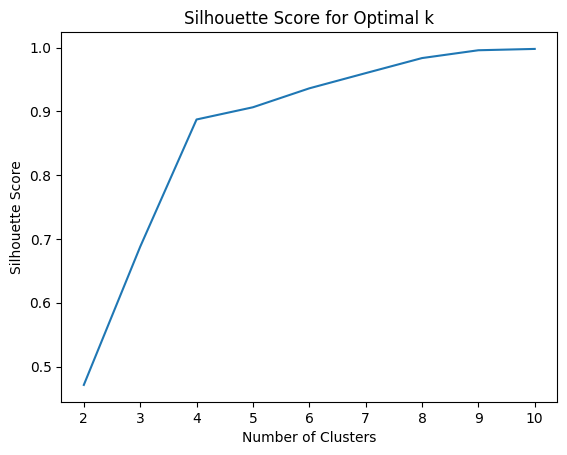

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min

max_k = 10

# Convert all column names to strings
X.columns = X.columns.astype(str)

# Now proceed with KMeans clustering
silhouette_scores = []

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto')
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plotting the silhouette scores
plt.plot(range(2, max_k + 1), silhouette_scores)
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


###Check the clustering result

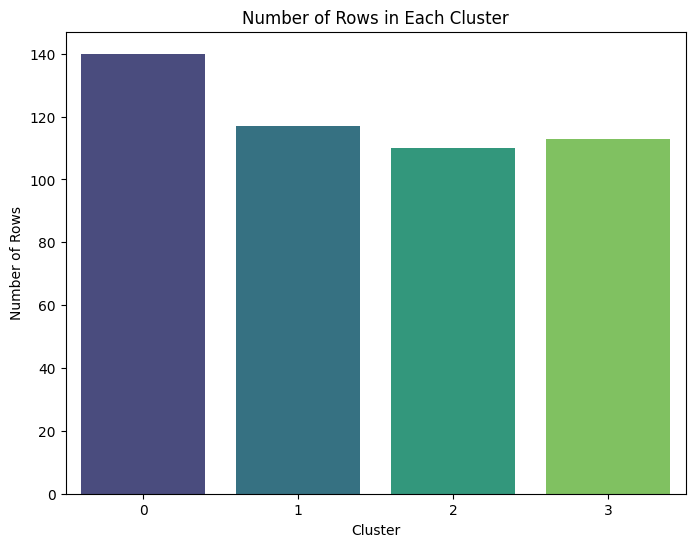

In [38]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_

df_stopword['Cluster'] = kmeans.labels_

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_stopword['Cluster'] contains the cluster labels assigned by k-means

# Count the number of rows in each cluster
cluster_counts = df_stopword['Cluster'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Rows in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Rows')
plt.show()

In [39]:
df_stopword['Cluster']
df['Predicted Cluster'] = df_stopword['Cluster']
df

,Sentiment,Acara TV,Text Tweet,Predicted Cluster
0,1,HitamPutihTransTV,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",1
1,1,HitamPutihTransTV,Selamat berbuka puasa Semoga amal ibadah hari ...,1
2,1,HitamPutihTransTV,"Ada nih di trans7 hitam putih, dia dpt penghar...",1
3,1,HitamPutihTransTV,selamat ya mas @adietaufan masuk hitamputih,1
4,1,HitamPutihTransTV,Asiknya nonton Hitam Putih Trans7,1
...,...,...,...,...
475,0,MataNajwaMetroTV,Saya lebih suka acara berita lain daripada Mat...,3
476,0,MataNajwaMetroTV,Metro TV seharusnya tidak mendukung acara yang...,3
477,0,MataNajwaMetroTV,Saya tidak setuju dengan pendekatan yang diamb...,3
478,0,MataNajwaMetroTV,Najwa Shihab terlalu sering menyela pembicaraa...,3


In [40]:
cluster_mapping = {
    0: 'IndonesiaLawyersClubTvOne',
    1: 'HitamPutihTransTV',
    2: 'KickAndyMetroTV',
    3: 'MataNajwaMetroTV'
}

df['Predicted Cluster Name'] = df['Predicted Cluster'].map(cluster_mapping)
df

,Sentiment,Acara TV,Text Tweet,Predicted Cluster,Predicted Cluster Name
0,1,HitamPutihTransTV,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",1,HitamPutihTransTV
1,1,HitamPutihTransTV,Selamat berbuka puasa Semoga amal ibadah hari ...,1,HitamPutihTransTV
2,1,HitamPutihTransTV,"Ada nih di trans7 hitam putih, dia dpt penghar...",1,HitamPutihTransTV
3,1,HitamPutihTransTV,selamat ya mas @adietaufan masuk hitamputih,1,HitamPutihTransTV
4,1,HitamPutihTransTV,Asiknya nonton Hitam Putih Trans7,1,HitamPutihTransTV
...,...,...,...,...,...
475,0,MataNajwaMetroTV,Saya lebih suka acara berita lain daripada Mat...,3,MataNajwaMetroTV
476,0,MataNajwaMetroTV,Metro TV seharusnya tidak mendukung acara yang...,3,MataNajwaMetroTV
477,0,MataNajwaMetroTV,Saya tidak setuju dengan pendekatan yang diamb...,3,MataNajwaMetroTV
478,0,MataNajwaMetroTV,Najwa Shihab terlalu sering menyela pembicaraa...,3,MataNajwaMetroTV


In [41]:
# Calculate accuracy
correct_predictions = (df['Acara TV'] == df['Predicted Cluster Name']).sum()
total_instances = len(df)
accuracy = correct_predictions / total_instances

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.42%


In [42]:
# Show wrongly predicted rows
wrong_predictions = df[df['Acara TV'] != df['Predicted Cluster Name']]
print("\nWrongly Predicted Rows:")
print(wrong_predictions.shape)
(wrong_predictions)


Wrongly Predicted Rows:
(22, 5)


,Sentiment,Acara TV,Text Tweet,Predicted Cluster,Predicted Cluster Name
39,1,HitamPutihTransTV,Bersyukurlah kita hidup di Indonesia #hitamput...,0,IndonesiaLawyersClubTvOne
56,0,HitamPutihTransTV,Miris ketika anak Indonesia kesulitan mengguna...,0,IndonesiaLawyersClubTvOne
95,0,HitamPutihTransTV,"Hidup itu pilihan, jangan pasrah dengan keadaan",0,IndonesiaLawyersClubTvOne
98,0,HitamPutihTransTV,"hanya membicarakan permasalahan orang lain, me...",0,IndonesiaLawyersClubTvOne
211,1,KickAndyMetroTV,mantan narapidana pun dirangkulnya untuk dicar...,0,IndonesiaLawyersClubTvOne
212,1,KickAndyMetroTV,Agung @eevnxx mampu membuktikan sebuah karya y...,0,IndonesiaLawyersClubTvOne
228,1,KickAndyMetroTV,Terima Kasih #kickandy sudah menginspirasi say...,3,MataNajwaMetroTV
273,0,KickAndyMetroTV,bikin sakit perut nonton kisah sarjana tertua ...,0,IndonesiaLawyersClubTvOne
280,0,KickAndyMetroTV,Orang Belanda aja peduli sama orang2 indonesia...,0,IndonesiaLawyersClubTvOne
282,0,KickAndyMetroTV,Indonesia2. Bahkan kita dididik untuk menjadi ...,0,IndonesiaLawyersClubTvOne


In [43]:
!pip install joblib

In [44]:
import joblib

# Save the model to a file
joblib.dump(kmeans, 'clustering_silhouette086.pkl')

['clustering_silhouette086.pkl']

###Final result

In [45]:
df['Acara TV'].sample(10)

401            HitamPutihTransTV
242              KickAndyMetroTV
46             HitamPutihTransTV
185    IndonesiaLawyersClubTvOne
301             MataNajwaMetroTV
292              KickAndyMetroTV
98             HitamPutihTransTV
283              KickAndyMetroTV
229              KickAndyMetroTV
149    IndonesiaLawyersClubTvOne
Name: Acara TV, dtype: object

In [46]:
df_stopword

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,...,neg_word,hitam_putih_term,hitam_putih_term_count,ilc_terms,ilc_terms_count,matanajwa_terms,matanajwa_terms_count,kickandy_terms,kickandy_terms_count,Cluster
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1.0,0.533333,0.586207,0.290909,0.571429,0.000000,0.4,0.0,0.0,...,0.0,1.0,0.2,0.0,0.0,0.0,0.00,0.0,0.0,1
1,selamat berbuka puasa semoga amal ibadah ni di...,1.0,0.533333,0.528736,0.236364,0.500000,0.000000,0.2,0.5,0.0,...,0.1,1.0,0.2,0.0,0.0,0.0,0.00,0.0,0.0,1
2,nih trans hitam putih dpt penghargaan norwegia...,1.0,0.400000,0.413793,0.263636,0.214286,0.333333,0.4,0.5,0.0,...,0.0,1.0,0.8,0.0,0.0,0.0,0.00,0.0,0.0,1
3,selamat mas @adietaufan masuk hitamputih,1.0,0.200000,0.241379,0.345455,0.357143,0.000000,0.0,0.0,0.0,...,0.1,1.0,0.2,0.0,0.0,0.0,0.00,0.0,0.0,1
4,asiknya nonton hitam putih trans,1.0,0.200000,0.160920,0.192727,0.214286,0.000000,0.2,0.0,0.0,...,0.0,1.0,0.6,0.0,0.0,0.0,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0.0,0.333333,0.195402,0.064935,0.285714,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.0,3
476,metro tv mendukung acara memprovokasi mata najwa,0.0,0.333333,0.321839,0.236364,0.357143,0.000000,0.2,0.0,0.0,...,0.3,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.0,3
477,setuju pendekatan diambil mata najwa malam,0.0,0.266667,0.264368,0.254545,0.357143,0.000000,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.0,3
478,najwa shihab menyela pembicaraan mata najwa,0.0,0.266667,0.275862,0.272727,0.285714,0.000000,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.0,3


####ILC = Cluster 0

In [47]:
ilc = df_stopword[df_stopword['Cluster'] == 0]
ilc

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,...,neg_word,hitam_putih_term,hitam_putih_term_count,ilc_terms,ilc_terms_count,matanajwa_terms,matanajwa_terms_count,kickandy_terms,kickandy_terms_count,Cluster
39,bersyukurlah hidup indonesia #hitamputihtrans,1.0,0.133333,0.310345,0.700000,0.214286,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.2,1.0,0.25,0.0,0.0,0.0,0.0,0
56,miris anak indonesia kesulitan bahasa indonesa...,0.0,0.600000,0.816092,0.424793,0.500000,0.333333,0.4,0.0,0.0,...,0.6,1.0,0.2,1.0,0.25,0.0,0.0,0.0,0.0,0
95,hidup pilihan pasrah,0.0,0.066667,0.045977,0.236364,0.142857,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
98,membicarakan permasalahan orang memalukan,0.0,0.133333,0.275862,0.618182,0.142857,0.333333,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0
100,suka banget nonton #indonesialawyersclub menam...,1.0,0.533333,0.839080,0.530909,0.357143,0.666667,0.6,0.0,0.0,...,0.4,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,@aniesbaswedan jaga jarak islamis radikal bang...,0.0,0.400000,0.425287,0.277273,0.500000,0.000000,0.2,0.0,0.0,...,0.6,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0
436,org namanya tampang nabi tp hati iblis sesuai ...,0.0,0.666667,0.632184,0.209091,0.571429,0.000000,0.4,0.5,0.0,...,0.2,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0
437,ngomong segitu dapet maksudnya #aneh #ilc,0.0,0.266667,0.229885,0.200000,0.142857,0.000000,0.4,0.5,0.0,...,0.2,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0
438,sumpah liat mukanya #fahrihamzah #ilc pengen g...,0.0,0.666667,0.597701,0.181818,0.571429,0.000000,0.6,0.0,0.0,...,0.1,0.0,0.0,1.0,0.25,0.0,0.0,0.0,0.0,0


####Hitam Putih = Cluster 1

In [48]:
hitam_putih = df_stopword[df_stopword['Cluster'] == 1]
hitam_putih

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,...,neg_word,hitam_putih_term,hitam_putih_term_count,ilc_terms,ilc_terms_count,matanajwa_terms,matanajwa_terms_count,kickandy_terms,kickandy_terms_count,Cluster
0,undang @nshanijkt hitamputih pemenang ssk jkt ...,1.0,0.533333,0.586207,0.290909,0.571429,0.000000,0.4,0.0,0.0,...,0.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1
1,selamat berbuka puasa semoga amal ibadah ni di...,1.0,0.533333,0.528736,0.236364,0.500000,0.000000,0.2,0.5,0.0,...,0.1,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1
2,nih trans hitam putih dpt penghargaan norwegia...,1.0,0.400000,0.413793,0.263636,0.214286,0.333333,0.4,0.5,0.0,...,0.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,1
3,selamat mas @adietaufan masuk hitamputih,1.0,0.200000,0.241379,0.345455,0.357143,0.000000,0.0,0.0,0.0,...,0.1,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1
4,asiknya nonton hitam putih trans,1.0,0.200000,0.160920,0.192727,0.214286,0.000000,0.2,0.0,0.0,...,0.0,1.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,hitam putih kehilangan daya tariknya episode,0.0,0.266667,0.287356,0.290909,0.214286,0.333333,0.2,0.0,0.0,...,0.4,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,1
416,drama hitam putih acara bermutu,0.0,0.200000,0.149425,0.170909,0.285714,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,1
417,menyesal menonton hitam putih nilai,0.0,0.200000,0.195402,0.258182,0.285714,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,1
418,episode terbaru hitam putih sehebat harapkan,0.0,0.266667,0.287356,0.290909,0.357143,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,1


####Kick Andy = Cluster 2

In [49]:
kick_andy = df_stopword[df_stopword['Cluster'] == 2]
kick_andy

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,...,neg_word,hitam_putih_term,hitam_putih_term_count,ilc_terms,ilc_terms_count,matanajwa_terms,matanajwa_terms_count,kickandy_terms,kickandy_terms_count,Cluster
200,ih lucu mas kick andy senyum,1.0,0.266667,0.103448,0.000000,0.357143,0.000000,0.0,0.0,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,2
201,nonton hasan merkids kick andy menginspirasi s...,1.0,0.400000,0.402299,0.250000,0.285714,0.333333,0.4,0.0,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,2
202,ubah mimpimu tindakan kick andy,1.0,0.200000,0.149425,0.170909,0.214286,0.000000,0.2,0.0,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,2
203,kickandy gokil #kickandy,1.0,0.066667,0.080460,0.345455,0.071429,0.000000,0.2,0.0,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,2
204,terima kasih menonton acara #kickandy eps ubah...,1.0,0.600000,0.643678,0.276033,0.285714,0.333333,0.8,0.5,0.0,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,narasumber kick andy menginspirasi relevan #ki...,0.0,0.333333,0.551724,0.548052,0.214286,0.000000,0.4,0.5,0.0,...,0.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,2
456,kick andy solusi konkret masalahmasalah diangk...,0.0,0.400000,0.574713,0.454545,0.357143,0.333333,0.2,0.0,0.0,...,0.7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,2
457,setuju pandangan dihadirkan kick andy #kickand...,0.0,0.333333,0.436782,0.392208,0.214286,0.000000,0.6,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,2
458,segmen kick andy kehilangan minat #kickandy #s...,0.0,0.333333,0.413793,0.361039,0.214286,0.333333,0.4,0.0,0.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,2


####Mata Najwa = Cluster 3

In [50]:
mata_najwa = df_stopword[df_stopword['Cluster'] == 3]
mata_najwa

,Text Tweet,Sentiment,word_count,letter_count,word_density,noun_count,verb_count,adj_count,adv_count,pron_count,...,neg_word,hitam_putih_term,hitam_putih_term_count,ilc_terms,ilc_terms_count,matanajwa_terms,matanajwa_terms_count,kickandy_terms,kickandy_terms_count,Cluster
228,terima kasih #kickandy menginspirasi membuka m...,1.0,0.600000,0.758621,0.375207,0.500000,0.333333,0.4,0.0,0.0,...,0.1,0.0,0.0,0.0,0.0,1.0,0.25,1.0,0.333333,3
300,setuju al misbah mata najwa kick andy program ...,1.0,0.466667,0.356322,0.127273,0.428571,0.000000,0.4,0.0,0.0,...,0.1,0.0,0.0,0.0,0.0,1.0,0.50,1.0,0.666667,3
301,metrotv mata najwa pancasila,1.0,0.133333,0.126437,0.263636,0.071429,0.333333,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.000000,3
302,selera gue gatau suka banget nonton metro tv k...,1.0,0.866667,0.632184,0.083636,0.714286,0.666667,0.2,0.5,0.0,...,0.1,0.0,0.0,0.0,0.0,1.0,0.50,1.0,0.666667,3
303,mantap mata najwa seru nih,1.0,0.200000,0.091954,0.061818,0.142857,0.333333,0.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,suka acara berita mata najwa metro tv,0.0,0.333333,0.195402,0.064935,0.285714,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.000000,3
476,metro tv mendukung acara memprovokasi mata najwa,0.0,0.333333,0.321839,0.236364,0.357143,0.000000,0.2,0.0,0.0,...,0.3,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.000000,3
477,setuju pendekatan diambil mata najwa malam,0.0,0.266667,0.264368,0.254545,0.357143,0.000000,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.000000,3
478,najwa shihab menyela pembicaraan mata najwa,0.0,0.266667,0.275862,0.272727,0.285714,0.000000,0.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.000000,3


#Classification

In [51]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Input, Dense, GlobalAveragePooling2D, Flatten, Activation, Dropout, GlobalMaxPool1D, Attention, Conv1D
from keras.losses import BinaryCrossentropy
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.backend as K
from sklearn.model_selection import KFold

##Hitam Putih

###Feature Engineering

####K-Fold and hyperparameters

In [52]:
from sklearn.model_selection import train_test_split

X = hitam_putih.drop(['Text Tweet', 'Sentiment', 'Cluster'], axis=1)

Y = hitam_putih['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(93, 19) (24, 19) (93,) (24,)


In [53]:
K.clear_session()

# Define the number of folds
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=69)

# Define hyperparameter values to try
learning_rates = [0.001, 0.0005]
num_nodes_list = [16, 32]
num_layers_list = [1, 2, 3]
epochs_list = [100, 200]

# Initialize lists to store the results from each fold
history_list = []
best_model = None
best_val_acc = 0.0

# Nested loops to iterate over hyperparameters
for learning_rate in learning_rates:
    for num_nodes in num_nodes_list:
        for num_layers in num_layers_list:
            for epochs in epochs_list:
                print(f"\nTesting hyperparameters: Learning Rate={learning_rate}, Num Nodes={num_nodes}, Num Layers={num_layers}, Epochs={epochs}")

                # Initialize lists to store the results from each fold for this set of hyperparameters
                val_acc_list = []

                # Loop over each fold
                for fold_num, (train_index, val_index) in enumerate(kf.split(X)):
                    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
                    y_train_fold, y_val_fold = Y[train_index], Y[val_index]

                    # Create and compile the model with the current hyperparameters
                    model = tf.keras.Sequential()
                    model.add(Dense(num_nodes, activation='relu', input_shape=(X_train_fold.shape[1],)))
                    model.add(Dropout(0.2))
                    for _ in range(num_layers):
                        model.add(Dense(num_nodes, activation='relu'))
                        model.add(Dropout(0.2))
                    model.add(Dense(1, activation='sigmoid'))

                    loss = tf.keras.losses.BinaryCrossentropy()
                    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
                    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

                    # Train the model with the current hyperparameters
                    history = model.fit(X_train_fold, y_train_fold, epochs=epochs, validation_data=(X_val_fold, y_val_fold), verbose=0)

                    # Store the validation accuracy for this fold
                    val_acc_list.append(np.max(history.history['val_accuracy']))

                    print(f"  Fold {fold_num + 1} Validation Accuracy: {np.max(history.history['val_accuracy'])}")

                # Calculate average validation accuracy across folds for this set of hyperparameters
                average_val_acc = np.mean(val_acc_list)

                # Print the average validation accuracy for this set of hyperparameters
                print(f"  Average Validation Accuracy Across Folds: {average_val_acc}")

                # Store the results for this set of hyperparameters
                history_list.append({
                    'learning_rate': learning_rate,
                    'num_nodes': num_nodes,
                    'num_layers': num_layers,
                    'epochs': epochs,
                    'average_val_acc': average_val_acc
                })

                # Check if this model is the best so far
                if average_val_acc > best_val_acc:
                    best_val_acc = average_val_acc
                    best_model = model

# After all hyperparameter combinations are tested, find the best set of hyperparameters
best_hyperparameters = max(history_list, key=lambda x: x['average_val_acc'])
print("\nBest Hyperparameters:")
print(best_hyperparameters)

# Save the best model to a file
model_name_h5 = 'hitam_putih_feateng_' + str(round(best_hyperparameters['average_val_acc'], 2)) + '_.h5'
model_name_keras = 'hitam_putih_feateng_' + str(round(best_hyperparameters['average_val_acc'], 2)) + '_.keras'
best_model.save(model_name_h5)
best_model.save(model_name_keras)


Testing hyperparameters: Learning Rate=0.001, Num Nodes=16, Num Layers=1, Epochs=100
  Fold 1 Validation Accuracy: 0.8333333134651184
  Fold 2 Validation Accuracy: 0.875
  Fold 3 Validation Accuracy: 0.95652174949646
  Fold 4 Validation Accuracy: 0.8695651888847351


KeyboardInterrupt: ignored

####Without K-fold but with hyperparameters

In [ ]:
# # Define hyperparameter values to try
# learning_rates = [0.001, 0.002]
# num_nodes_list = [16, 32]
# num_layers_list = [1, 2, 3, 4]
# epochs_list = [25, 50, 100]

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=69)

# # Initialize lists to store the results from each hyperparameter set
# history_list = []

# # Loop over hyperparameters
# for learning_rate in learning_rates:
#     for num_nodes in num_nodes_list:
#         for num_layers in num_layers_list:
#             for epochs in epochs_list:
#                 print(f"\nTesting hyperparameters: Learning Rate={learning_rate}, Num Nodes={num_nodes}, Num Layers={num_layers}, Epochs={epochs}")

#                 # Create and compile the model with the current hyperparameters
#                 model_hitamputih_test = tf.keras.Sequential()
#                 model_hitamputih_test.add(Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1],)))
#                 model_hitamputih_test.add(Dropout(0.2))
#                 for _ in range(num_layers):
#                     model_hitamputih_test.add(Dense(num_nodes, activation='relu'))
#                     model_hitamputih_test.add(Dropout(0.2))
#                 model_hitamputih_test.add(Dense(1, activation='sigmoid'))

#                 loss = tf.keras.losses.BinaryCrossentropy()
#                 optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#                 model_hitamputih_test.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

#                 # Train the model with the current hyperparameters
#                 history = model_hitamputih_test.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=0)

#                 # Print the result for the single validation split
#                 val_accuracy = np.max(history.history['val_accuracy'])
#                 print(f"Validation Accuracy: {val_accuracy}")

#                 # Store the results for this set of hyperparameters
#                 history_list.append({
#                     'learning_rate': learning_rate,
#                     'num_nodes': num_nodes,
#                     'num_layers': num_layers,
#                     'epochs': epochs,
#                     'val_accuracy': val_accuracy
#                 })

# # After all hyperparameter combinations are tested, find the best set of hyperparameters
# best_hyperparameters = max(history_list, key=lambda x: x['val_accuracy'])
# print("\nBest Hyperparameters:")
# print(best_hyperparameters)


##ILC

###Feature Engineering

####K-Fold and hyperparameters

In [ ]:
from sklearn.model_selection import train_test_split

X = ilc.drop(['Text Tweet', 'Sentiment', 'Cluster'], axis=1)

Y = ilc['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
from sklearn.model_selection import KFold
K.clear_session()

# Define the number of folds
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=69)

# Define hyperparameter values to try
learning_rates = [0.001, 0.0005]
num_nodes_list = [16, 32]
num_layers_list = [1, 2, 3]
epochs_list = [100, 200]

# Initialize lists to store the results from each fold
history_list = []
best_model = None
best_val_acc = 0.0

# Nested loops to iterate over hyperparameters
for learning_rate in learning_rates:
    for num_nodes in num_nodes_list:
        for num_layers in num_layers_list:
            for epochs in epochs_list:
                print(f"\nTesting hyperparameters: Learning Rate={learning_rate}, Num Nodes={num_nodes}, Num Layers={num_layers}, Epochs={epochs}")

                # Initialize lists to store the results from each fold for this set of hyperparameters
                val_acc_list = []

                # Loop over each fold
                for fold_num, (train_index, val_index) in enumerate(kf.split(X)):
                    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
                    y_train_fold, y_val_fold = Y[train_index], Y[val_index]

                    # Create and compile the model with the current hyperparameters
                    model = tf.keras.Sequential()
                    model.add(Dense(num_nodes, activation='relu', input_shape=(X_train_fold.shape[1],)))
                    model.add(Dropout(0.2))
                    for _ in range(num_layers):
                        model.add(Dense(num_nodes, activation='relu'))
                        model.add(Dropout(0.2))
                    model.add(Dense(1, activation='sigmoid'))

                    loss = tf.keras.losses.BinaryCrossentropy()
                    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
                    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

                    # Train the model with the current hyperparameters
                    history = model.fit(X_train_fold, y_train_fold, epochs=epochs, validation_data=(X_val_fold, y_val_fold), verbose=0)

                    # Store the validation accuracy for this fold
                    val_acc_list.append(np.max(history.history['val_accuracy']))

                    print(f"  Fold {fold_num + 1} Validation Accuracy: {np.max(history.history['val_accuracy'])}")

                # Calculate average validation accuracy across folds for this set of hyperparameters
                average_val_acc = np.mean(val_acc_list)

                # Print the average validation accuracy for this set of hyperparameters
                print(f"  Average Validation Accuracy Across Folds: {average_val_acc}")

                # Store the results for this set of hyperparameters
                history_list.append({
                    'learning_rate': learning_rate,
                    'num_nodes': num_nodes,
                    'num_layers': num_layers,
                    'epochs': epochs,
                    'average_val_acc': average_val_acc
                })

                # Check if this model is the best so far
                if average_val_acc > best_val_acc:
                    best_val_acc = average_val_acc
                    best_model = model

# After all hyperparameter combinations are tested, find the best set of hyperparameters
best_hyperparameters = max(history_list, key=lambda x: x['average_val_acc'])
print("\nBest Hyperparameters:")
print(best_hyperparameters)

# Save the best model to a file
model_name_h5 = 'ilc_feateng_' + str(round(best_hyperparameters['average_val_acc'], 2)) + '_.h5'
model_name_keras = 'ilc_feateng_' + str(round(best_hyperparameters['average_val_acc'], 2)) + '_.keras'
best_model.save(model_name_h5)
best_model.save(model_name_keras)

##Mata Najwa

###Feature Engineering

####K-Fold and hyperparameters

In [ ]:
from sklearn.model_selection import train_test_split

X = mata_najwa.drop(['Text Tweet', 'Sentiment', 'Cluster'], axis=1)

Y = mata_najwa['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
K.clear_session()

# Define the number of folds
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=69)

# Define hyperparameter values to try
learning_rates = [0.001, 0.0005]
num_nodes_list = [16, 32]
num_layers_list = [1, 2, 3]
epochs_list = [100, 200]

# Initialize lists to store the results from each fold
history_list = []
best_model = None
best_val_acc = 0.0

# Nested loops to iterate over hyperparameters
for learning_rate in learning_rates:
    for num_nodes in num_nodes_list:
        for num_layers in num_layers_list:
            for epochs in epochs_list:
                print(f"\nTesting hyperparameters: Learning Rate={learning_rate}, Num Nodes={num_nodes}, Num Layers={num_layers}, Epochs={epochs}")

                # Initialize lists to store the results from each fold for this set of hyperparameters
                val_acc_list = []

                # Loop over each fold
                for fold_num, (train_index, val_index) in enumerate(kf.split(X)):
                    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
                    y_train_fold, y_val_fold = Y[train_index], Y[val_index]

                    # Create and compile the model with the current hyperparameters
                    model = tf.keras.Sequential()
                    model.add(Dense(num_nodes, activation='relu', input_shape=(X_train_fold.shape[1],)))
                    model.add(Dropout(0.2))
                    for _ in range(num_layers):
                        model.add(Dense(num_nodes, activation='relu'))
                        model.add(Dropout(0.2))
                    model.add(Dense(1, activation='sigmoid'))

                    loss = tf.keras.losses.BinaryCrossentropy()
                    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
                    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

                    # Train the model with the current hyperparameters
                    history = model.fit(X_train_fold, y_train_fold, epochs=epochs, validation_data=(X_val_fold, y_val_fold), verbose=0)

                    # Store the validation accuracy for this fold
                    val_acc_list.append(np.max(history.history['val_accuracy']))

                    print(f"  Fold {fold_num + 1} Validation Accuracy: {np.max(history.history['val_accuracy'])}")

                # Calculate average validation accuracy across folds for this set of hyperparameters
                average_val_acc = np.mean(val_acc_list)

                # Print the average validation accuracy for this set of hyperparameters
                print(f"  Average Validation Accuracy Across Folds: {average_val_acc}")

                # Store the results for this set of hyperparameters
                history_list.append({
                    'learning_rate': learning_rate,
                    'num_nodes': num_nodes,
                    'num_layers': num_layers,
                    'epochs': epochs,
                    'average_val_acc': average_val_acc
                })

                # Check if this model is the best so far
                if average_val_acc > best_val_acc:
                    best_val_acc = average_val_acc
                    best_model = model

# After all hyperparameter combinations are tested, find the best set of hyperparameters
best_hyperparameters = max(history_list, key=lambda x: x['average_val_acc'])
print("\nBest Hyperparameters:")
print(best_hyperparameters)

# Save the best model to a file
model_name_h5 = 'mata_najwa_feateng_' + str(round(best_hyperparameters['average_val_acc'], 2)) + '_.h5'
model_name_keras = 'mata_najwa_feateng_' + str(round(best_hyperparameters['average_val_acc'], 2)) + '_.keras'
best_model.save(model_name_h5)
best_model.save(model_name_keras)

##Kick Andy

###Feature Engineering

####K-Fold and hyperparameters

In [ ]:
from sklearn.model_selection import train_test_split

X = kick_andy.drop(['Text Tweet', 'Sentiment', 'Cluster'], axis=1)

Y = kick_andy['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=69)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
K.clear_session()

# Define the number of folds
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=69)

# Define hyperparameter values to try
learning_rates = [0.001, 0.0005]
num_nodes_list = [16, 32]
num_layers_list = [1, 2, 3]
epochs_list = [100, 200]

# Initialize lists to store the results from each fold
history_list = []
best_model = None
best_val_acc = 0.0

# Nested loops to iterate over hyperparameters
for learning_rate in learning_rates:
    for num_nodes in num_nodes_list:
        for num_layers in num_layers_list:
            for epochs in epochs_list:
                print(f"\nTesting hyperparameters: Learning Rate={learning_rate}, Num Nodes={num_nodes}, Num Layers={num_layers}, Epochs={epochs}")

                # Initialize lists to store the results from each fold for this set of hyperparameters
                val_acc_list = []

                # Loop over each fold
                for fold_num, (train_index, val_index) in enumerate(kf.split(X)):
                    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
                    y_train_fold, y_val_fold = Y[train_index], Y[val_index]

                    # Create and compile the model with the current hyperparameters
                    model = tf.keras.Sequential()
                    model.add(Dense(num_nodes, activation='relu', input_shape=(X_train_fold.shape[1],)))
                    model.add(Dropout(0.2))
                    for _ in range(num_layers):
                        model.add(Dense(num_nodes, activation='relu'))
                        model.add(Dropout(0.2))
                    model.add(Dense(1, activation='sigmoid'))

                    loss = tf.keras.losses.BinaryCrossentropy()
                    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
                    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

                    # Train the model with the current hyperparameters
                    history = model.fit(X_train_fold, y_train_fold, epochs=epochs, validation_data=(X_val_fold, y_val_fold), verbose=0)

                    # Store the validation accuracy for this fold
                    val_acc_list.append(np.max(history.history['val_accuracy']))

                    print(f"  Fold {fold_num + 1} Validation Accuracy: {np.max(history.history['val_accuracy'])}")

                # Calculate average validation accuracy across folds for this set of hyperparameters
                average_val_acc = np.mean(val_acc_list)

                # Print the average validation accuracy for this set of hyperparameters
                print(f"  Average Validation Accuracy Across Folds: {average_val_acc}")

                # Store the results for this set of hyperparameters
                history_list.append({
                    'learning_rate': learning_rate,
                    'num_nodes': num_nodes,
                    'num_layers': num_layers,
                    'epochs': epochs,
                    'average_val_acc': average_val_acc
                })

                # Check if this model is the best so far
                if average_val_acc > best_val_acc:
                    best_val_acc = average_val_acc
                    best_model = model

# After all hyperparameter combinations are tested, find the best set of hyperparameters
best_hyperparameters = max(history_list, key=lambda x: x['average_val_acc'])
print("\nBest Hyperparameters:")
print(best_hyperparameters)

# Save the best model to a file
model_name_h5 = 'kick_andy_feateng_' + str(round(best_hyperparameters['average_val_acc'], 2)) + '_.h5'
model_name_keras = 'kick_andy_feateng_' + str(round(best_hyperparameters['average_val_acc'], 2)) + '_.keras'
best_model.save(model_name_h5)
best_model.save(model_name_keras)

#Pipeline

In [ ]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
!pip install joblib

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

##Preprocessing Pipeline

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
from sklearn.exceptions import NotFittedError
import re
import joblib
# Define custom transformers for each preprocessing step
class LowerCaseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed.iloc[:, 0] = X_transformed.iloc[:, 0].str.lower()
        return X_transformed

class CleanLinksTransformer(BaseEstimator, TransformerMixin):
    @staticmethod
    def clean_links(text):
        # Define a regular expression pattern to match URLs
        url_pattern = re.compile(r'https?://\S+|www\.\S+')

        # Use the sub() function to replace URLs with an empty string
        return url_pattern.sub('', text)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed.iloc[:, 0] = X_transformed.iloc[:, 0].apply(self.clean_links)
        return X_transformed

class RemovePunctuationAndWhitespaceTransformer(BaseEstimator, TransformerMixin):
    @staticmethod
    def remove_punctuation_and_whitespace(text):
        # Use regular expression to remove punctuation and whitespace
        cleaned_text = re.sub(r'[?(),.;:!$%^&*_-]', '', text)
        cleaned_text = re.sub(r'\d+', '', cleaned_text)
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
        return cleaned_text

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed.iloc[:, 0] = X_transformed.iloc[:, 0].apply(self.remove_punctuation_and_whitespace)
        return X_transformed

class StopWordRemoverTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stopwords = []

    def fit(self, X, y=None):
        stop_factory = StopWordRemoverFactory()
        more_stopword = ["yg", "dgn", 'dg', 'kok', 'nya', 'aja', 'lg']
        stopwords = ['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat']
        negation_words = ['tidak', 'bukan', 'jangan', 'tak', 'tiada']
        self.stopwords = stop_factory.get_stop_words() + more_stopword + stopwords
        self.stopwords = [word for word in self.stopwords if word not in negation_words]
        self.remover = stop_factory.create_stop_word_remover(self.stopwords)
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed.iloc[:, 0] = X_transformed.iloc[:, 0].apply(lambda text: " ".join([word for word in text.split() if word not in self.stopwords]))
        return X_transformed

class PosTaggerTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    pos_dic = {
        'noun' : ['NN','NNS','NNP','NNPS'],
        'pron' : ['PRP','PRP$','WP','WP$'],
        'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
        'adj' :  ['JJ','JJR','JJS'],
        'adv' : ['RB','RBR','RBS','WRB']
    }
    @staticmethod
    def pos_check(x, flag):
        cnt = 0
        try:
            wiki = TextBlob(x)
            for tup in wiki.tags:
                ppo = list(tup)[1]
                if ppo in pos_dic[flag]:
                    cnt += 1
        except:
            pass
        return cnt

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['noun_count'] = X_transformed.iloc[:, 0].apply(lambda x: self.pos_check(x, 'noun'))
        X_transformed['verb_count'] = X_transformed.iloc[:, 0].apply(lambda x: self.pos_check(x, 'verb'))
        X_transformed['adj_count'] = X_transformed.iloc[:, 0].apply(lambda x: self.pos_check(x, 'adj'))
        X_transformed['adv_count'] = X_transformed.iloc[:, 0].apply(lambda x: self.pos_check(x, 'adv'))
        X_transformed['pron_count'] = X_transformed.iloc[:, 0].apply(lambda x: self.pos_check(x, 'pron'))
        return X_transformed

class KeywordPresenceTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, keywords, column_name, count_column_name):
        self.keywords = keywords
        self.column_name = column_name
        self.count_column_name = count_column_name

    def fit(self, X, y=None):
        print("Column names before fit:", X.columns)
        return self

    def transform(self, X):
        X_transformed = X.copy()
        print("Column names before transform:", X_transformed.columns)

        X_transformed[self.column_name] = X_transformed.iloc[:, 0].apply(
            lambda x: int(any(re.search(r'\b{}\b'.format(re.escape(word)), x, flags=re.IGNORECASE) for word in self.keywords))
        )

        X_transformed[self.count_column_name] = X_transformed.iloc[:, 0].apply(
            lambda x: sum(1 for word in self.keywords if re.search(r'\b{}\b'.format(re.escape(word)), x, flags=re.IGNORECASE))
        )

        return X_transformed

class BooleanToBinaryTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for column in X_transformed.columns:
            if X_transformed[column].dtype == 'bool':
                X_transformed[column] = X_transformed[column].astype(int)
        return X_transformed

class AdditionalFeatureTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['word_count'] = X_transformed.iloc[:, 0].apply(lambda x: len(x.split()))
        X_transformed['letter_count'] = X_transformed.iloc[:, 0].apply(lambda x: len([c for c in x if c.isalpha()]))
        X_transformed['word_density'] = X_transformed['letter_count'] / X_transformed['word_count']
        X_transformed['hashtag_count'] = X_transformed.iloc[:, 0].apply(lambda x: len(re.findall(r'#\w+', x)))
        return X_transformed

class MinMaxScalerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_range=(0, 1)):
        self.scaler = MinMaxScaler(feature_range=feature_range)
        self.fitted_ = False

    def fit(self, X, y=None):
        self.scaler.fit(X.select_dtypes(include=['float64', 'int64']))  # Only fit on numeric columns
        self.fitted_ = True
        return self

    def transform(self, X):
        if not self.fitted_:
            X_transformed = X.copy()
            X_transformed[X.columns] = self.scaler.fit(X.drop(X.columns[0], axis=1))
        X_transformed = X.copy()
        numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
        print(numeric_columns)
        X_transformed[numeric_columns] = self.scaler.transform(X[numeric_columns])
        return X_transformed

class PositiveNegativeWordsCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, positive_words, negative_words):
        self.positive_words = positive_words
        self.negative_words = negative_words

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['pos_word'] = X_transformed.iloc[:, 0].apply(lambda x: sum(word in x for word in self.positive_words))
        X_transformed['neg_word'] = X_transformed.iloc[:, 0].apply(lambda x: sum(word in x for word in self.negative_words))
        return X_transformed

#Positive Keywords
pos_word = '/content/drive/MyDrive/positive_keyword.txt'

with open(pos_word, 'r') as file:
    pos_words = [line.strip() for line in file]

#Negative Keywords
neg_word = '/content/drive/MyDrive/negatif_keyword.txt'

with open(neg_word, 'r') as file:
    neg_words = [line.strip() for line in file]


hitam_putih_terms = ['deddy', 'dedy', 'daddy', 'corbuzier', 'hitam', 'hitamputih', 'hitamputiht', 'hitamputihtrans', 'hitamputihtrans7', 'putih', 'trans', 'trans7']
ilc_terms = ['indonesialawyersclub', 'ilc', 'indonesia', 'lawyers', 'club', 'lawyer', 'hukum', 'karni', 'karniilyas', 'ilyas', 'ilctvone']
matanajwa_terms = ['matanajwa', 'mata', 'najwa', 'matanajwametrotv', 'najwashihab', 'shihab', 'tv_matanajwa']
kickandy_terms = ['kickandy', 'kick', 'andy', 'kickandyshow', 'kickandyp', 'kickand', 'kickandymetrotv']

# Create a pipeline with the defined transformers
preprocessing_pipeline = Pipeline([
    ('lowercase', LowerCaseTransformer()),
    ('clean_links', CleanLinksTransformer()),
    ('remove_punctuation_whitespace', RemovePunctuationAndWhitespaceTransformer()),
    ('stopword_removal', StopWordRemoverTransformer()),
    ('additional_features', AdditionalFeatureTransformer()),
    ('pos_tagger', PosTaggerTransformer()),
    ('positive_negative_words_counter', PositiveNegativeWordsCounterTransformer(pos_words, neg_words)),
    ('hitam_putih_keywords', KeywordPresenceTransformer(hitam_putih_terms, 'hitam_putih_term', 'hitam_putih_term_count')),
    ('ilc_keywords', KeywordPresenceTransformer(ilc_terms, 'ilc_terms', 'ilc_terms_count')),
    ('matanajwa_keywords', KeywordPresenceTransformer(matanajwa_terms, 'matanajwa_terms', 'matanajwa_terms_count')),
    ('kickandy_keywords', KeywordPresenceTransformer(kickandy_terms, 'kickandy_terms', 'kickandy_terms_count')),
    ('boolean_to_binary', BooleanToBinaryTransformer()),
    ('min_max_scaler', MinMaxScalerTransformer(feature_range=(0, 1)))
])

###Custom Test Data

In [73]:
import pandas as pd

print("ILC          = 0")
print("Hitam Putih  = 1")
print("Kick Andy    = 2")
print("Mata Najwa   = 3")

# Create a list of text data
data = [
    "Tak Samarkan Wajah Orangtua Pelaku Nikah Dini, KPI Jatuhkan Sanksi untuk “Hitam Putih” Trans 7",
    "Acara televisi apa yang paling kamu sukai?— Hitam Putih Trans 7",
    "Saya suka video @YouTube http://youtu.be/7DWnYHofyCE?a Roy Kiyoshi Di Hitam Putih Trans 7",
    "Sarah Viloid player PUBGM live on Hitam Putih Trans 7...Keren cuukk...",
    "auto ikutan ketawa atau senyum tiap bu iriana \"ahahaha\" di video mata najwa",
    "nonton mata najwa ke rumah pak jokowi katanya bu iriana makanan yang harus ada itu kerupuk karak wkwk sebagai orang oslo juga, i can relate pak ^^",
    "Abis nonton rahasia keluarga Pak @jokowi di mata najwa, gemesssssssssssss! Semoga bapak & keluarga sehat selalu xx",
    "Menurut gua, acara mata najwa yg kemaren bisa jd trending di youtube, gara2 fans nya Jan Ethes 😍",
    "Mata najwa eps kali ini eps terkalem, terenak diliat, yg pasti bikin tersenyum juga terharu masa... :')",
    "Acara mata Najwa paling konyol paling jelek pembawa acaranya...",
    "jelek bro membuat opini sesat yang halus itulah mata najwa",
    "@budimandjatmiko TUMBEN ARGUMENTMU DI MATA NAJWA JELEK, BANG...KELIATAN KLO LU KAGAK MENGUASAI BAHAN...",
    "ILC sudah G bagus.... kalau Ulama 1 orang di jegal, ILC langsung Respon tapi korban PHK Freepoert 8.300 dan yg sudah meninggal akibat Bpjs di tutup ILC dan Karni diam.. g berani angkat ke publik.",
    "Bagus banget ini kesaksiannya Ali Imron di ILC @tvOneNews. Nonton deh guys. https://youtube.com/watch?v=IQRsWbpUDr4",
    "Tema ILC malam ini bagus.  Tidak membahas politik yg membosankan. Malam ini kita diajak merenung, mencari apa yg sslah dg sepak bola Indonesia. Minim juara tp tiap tahun ada korban jiwa",
    "Acara ILC bagus, kami sarankan kl ada nara sumber yg sdh pojokkan dan permalukan org lain hrp segera dicegah",
    "Ciye ciyeeee kena block nih yee. Gpp, tetap tak pantau acaramu, @ILC_tvOnenews , jangan kau jelek-jelekkan UGM ya. Tolong block saya lagi pake akun yg ditag 🙏🙏",
    "Lambe Turah aja bisa ngalahin popularitas sekelas Kick Andy. Tuh lambe diomongin dimana-mana. Ampun dehh..kadang yang buruk itu emang baik *loh",
    "Kick Andy semenjak berubah jadi acara filantropi jadi jelek. Awalnya benar-benar \"kick\" mengajukan pertanyaan ke mantan presiden Gus Dur sampai Mayor Alfredo di tengah pusaran konflik Timor Leste.",
    "Hoam.... Acara Kick andy bisa juga jelek gini.",
    "Tonton Kick Andy di Metro TV sekarang. Ada anak Makassar peraih Habibie Award dan perancang kapal selam tanpa awak. #AslinaRewa"
]

real_cluster = [1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2]
Sentiment = [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]

# Create a DataFrame
df_test = pd.DataFrame(list(zip(data, real_cluster, Sentiment)), columns=['Text Tweet', 'Real Cluster', 'Sentiment'])

# Display the DataFrame
df_test.sample(5)

ILC          = 0
Hitam Putih  = 1
Kick Andy    = 2
Mata Najwa   = 3


,Text Tweet,Real Cluster,Sentiment
14,Tema ILC malam ini bagus. Tidak membahas poli...,0,1
8,"Mata najwa eps kali ini eps terkalem, terenak ...",3,1
18,Kick Andy semenjak berubah jadi acara filantro...,2,0
3,Sarah Viloid player PUBGM live on Hitam Putih ...,1,1
10,jelek bro membuat opini sesat yang halus itula...,3,0


###Sampling from original DataFrame as Testing Data

In [74]:
df_test = df.drop(['Predicted Cluster', 'Predicted Cluster Name'], axis=1).sample(20)

cluster_mapping = {
    'IndonesiaLawyersClubTvOne': 0,
    'HitamPutihTransTV': 1,
    'KickAndyMetroTV': 2,
    'MataNajwaMetroTV': 3
}
df_test['Real Cluster'] = df_test['Acara TV'].map(cluster_mapping)

# Display the DataFrame
df_test.sample(5)

,Sentiment,Acara TV,Text Tweet,Real Cluster
329,1,MataNajwaMetroTV,"Tjokro dan rumahnya menjadi teladan, tentang s...",3
111,1,IndonesiaLawyersClubTvOne,Ini yg bikin adem Hati.. Aa Gymnastiar #ilc,0
73,0,HitamPutihTransTV,Kok berita nya ga nyebar sih #HitamPutihT7 #Tr...,1
261,0,KickAndyMetroTV,#kickandy Bung Andy cuma mampir dgn gaya remaj...,2
5,1,HitamPutihTransTV,@TRANS7 acara paling komplit dan menarik apala...,1


###Another Custom Test Data

In [76]:
df_test = pd.read_csv('/content/data test.csv').drop(['Jumlah Retweet', 'Id'], axis=1)

cluster_mapping = {
    'IndonesiaLawyersClubTvOne': 0,
    'HitamPutihTransTV': 1,
    'KickAndyMetroTV': 2,
    'MataNajwaMetroTV': 3
}
df_test['Real Cluster'] = df_test['Acara TV'].map(cluster_mapping)
df_test['Sentiment'] = df_test['Sentiment'].map({'negative': 0, 'positive': 1})
# Display the DataFrame
df_test.sample(5)

,Sentiment,Acara TV,Text Tweet,Real Cluster
0,1,HitamPutihTransTV,Kangen jeketi jadi bintang tamu Hitam Putih Tr...,1
12,1,HitamPutihTransTV,Acara hitam putih di trans7 topiknya bagus nih...,1
13,1,IndonesiaLawyersClubTvOne,Adem dengerin nasehat dari Aa gym semoga sehat...,0
7,1,MataNajwaMetroTV,Salut dan bangga sm pak BJ. Habibie utk yg kes...,3
5,1,IndonesiaLawyersClubTvOne,Ini yg bikin adem Hati.. Aa Gymnastiar #ilc,0


###Preprocessing

In [77]:
# Apply the pipeline to your DataFrame
df_preprocessed = preprocessing_pipeline.transform(df_test[['Text Tweet']])
df_preprocessed['Sentiment'] = df_test['Sentiment']
df_preprocessed['Real Cluster'] = df_test['Real Cluster']
df_preprocessed.sample(5)

,Text Tweet,word_count,letter_count,word_density,hashtag_count,noun_count,verb_count,adj_count,adv_count,pron_count,...,hitam_putih_term,hitam_putih_term_count,ilc_terms,ilc_terms_count,matanajwa_terms,matanajwa_terms_count,kickandy_terms,kickandy_terms_count,Sentiment,Real Cluster
7,salut bangga sm bj habibie utk kesekian kaliny...,0.4,0.491228,0.347518,0.5,0.454545,0.0,0.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,1,3
17,liat hitam putih trans sanggu ganteng,0.1,0.070175,0.148936,0.0,0.272727,0.5,0.000000,0.0,0.0,...,1.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,indahnya ilc malam pemuka agama rangkul setuju...,0.8,0.964912,0.383797,0.5,1.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0
5,bikin adem hati aa gymnastiar #ilc,0.1,0.000000,0.000000,0.5,0.272727,0.0,0.333333,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0
19,setuju banget ucapan deddy corbuzier hitam put...,0.9,0.771930,0.106383,0.0,0.727273,0.5,1.000000,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


##Clustering Pipeline

In [78]:
#Taking only the features that are good for clustering which are boolean features of whether the data contain terms related to each aspect
X = df_preprocessed.drop(['Text Tweet', 'Real Cluster', 'Sentiment', 'pos_word', 'neg_word', 'hitam_putih_term_count', 'ilc_terms_count', 'matanajwa_terms_count', 'kickandy_terms_count', 'word_count', 'letter_count', 'word_density', 'noun_count', 'verb_count', 'adj_count', 'adv_count', 'pron_count', 'hashtag_count'], axis=1)

X.sample(5)

,hitam_putih_term,ilc_terms,matanajwa_terms,kickandy_terms
18,1.0,0.0,0.0,0.0
12,1.0,0.0,0.0,0.0
13,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
20,0.0,1.0,0.0,0.0


In [79]:
# Load the saved model
loaded_kmeans = joblib.load('clustering_silhouette086.pkl')

In [80]:
# Use the loaded model to predict clusters for the new data
new_data_clusters = loaded_kmeans.predict(X)

# Add the predicted clusters to the DataFrame
df_preprocessed['Predicted Cluster'] = new_data_clusters
df_test['Predicted Cluster'] = new_data_clusters

###Checking the clustering "accuracy" based on the real cluster

In [81]:
print("ILC          = 0")
print("Hitam Putih  = 1")
print("Kick Andy    = 2")
print("Mata Najwa   = 3")

ILC          = 0
Hitam Putih  = 1
Kick Andy    = 2
Mata Najwa   = 3


In [82]:
df_test.sample(5)

,Sentiment,Acara TV,Text Tweet,Real Cluster,Predicted Cluster
17,1,HitamPutihTransTV,"Tadi ada yg liat hitam putih di trans7 ga, Ada...",1,1
8,1,HitamPutihTransTV,Nonton kisah anastasya wella di #hitamputihtra...,1,1
7,1,MataNajwaMetroTV,Salut dan bangga sm pak BJ. Habibie utk yg kes...,3,3
5,1,IndonesiaLawyersClubTvOne,Ini yg bikin adem Hati.. Aa Gymnastiar #ilc,0,0
14,1,IndonesiaLawyersClubTvOne,Penjelasan Kapolri jelas dan tegas. Barakallah...,0,0


####Calculate Clustering "Accuracy" Based of the Actual Aspect

In [83]:
# Calculate accuracy
correct_predictions = (df_test['Real Cluster'] == df_test['Predicted Cluster']).sum()
total_instances = len(df_test)
accuracy = correct_predictions / total_instances

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.24%


In [84]:
df_preprocessed.sample(5) #Used for the classification

,Text Tweet,word_count,letter_count,word_density,hashtag_count,noun_count,verb_count,adj_count,adv_count,pron_count,...,hitam_putih_term_count,ilc_terms,ilc_terms_count,matanajwa_terms,matanajwa_terms_count,kickandy_terms,kickandy_terms_count,Sentiment,Real Cluster,Predicted Cluster
1,indahnya ilc malam pemuka agama rangkul setuju...,0.8,0.964912,0.383797,0.5,1.000000,0.0,0.000000,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,0
0,kangen jeketi bintang tamu hitam putih trans s...,1.0,0.824561,0.074468,0.0,1.000000,0.5,0.333333,0.0,0.0,...,0.6,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
3,semoga jokowi acara mata najwa dipelosok diatasi,0.2,0.245614,0.297872,0.0,0.454545,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,3,3
5,bikin adem hati aa gymnastiar #ilc,0.1,0.000000,0.000000,0.5,0.272727,0.0,0.333333,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,0
18,terima kasih menyaksikan hitam putih semoga me...,0.3,0.543860,0.605053,0.0,0.545455,0.0,0.000000,0.0,0.0,...,0.4,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1


##Classification Pipeline

In [85]:
from keras.models import load_model

# Define classification pipelines for each model
model_ilc_feateng = load_model('/content/ilc_feateng_0.89_.keras')
model_kickandy_feateng = load_model('/content/kick_andy_feateng_0.85_.keras')
model_hitamputih_feateng = load_model('/content/hitam_putih_feateng_0.88_.keras')
model_matanajwa_feateng = load_model('/content/mata_najwa_feateng_0.85_.keras')

print("Model_ilc_feateng input shape:", model_ilc_feateng.input_shape)
print("model_kickandy_feateng input shape:", model_kickandy_feateng.input_shape)
print("model_hitamputih_feateng input shape:", model_hitamputih_feateng.input_shape)
print("model_matanajwa_feateng input shape:", model_matanajwa_feateng.input_shape)


Model_ilc_feateng input shape: (None, 19)
model_kickandy_feateng input shape: (None, 19)
model_hitamputih_feateng input shape: (None, 19)
model_matanajwa_feateng input shape: (None, 19)


In [86]:
def predict_sentiment(row):
    text_vectorized = row.drop(['Text Tweet', 'Sentiment', 'Predicted Cluster', 'Real Cluster']).values.astype(np.float32)
    text_vectorized = text_vectorized.reshape(1, -1)

    if row['Predicted Cluster'] == 0:
        print("Cluster = 0")
        raw_prediction = model_ilc_feateng.predict(text_vectorized)[0]
    elif row['Predicted Cluster'] == 1:
        print("Cluster = 1")
        raw_prediction = model_hitamputih_feateng.predict(text_vectorized)[0]
    elif row['Predicted Cluster'] == 2:
        print("Cluster = 2")
        raw_prediction = model_kickandy_feateng.predict(text_vectorized)[0]
    elif row['Predicted Cluster'] == 3:
        print("Cluster = 3")
        raw_prediction = model_matanajwa_feateng.predict(text_vectorized)[0]
    else:
        return -1  # Handle the case where the cluster is not in the expected range
    print("Raw Prediction:", raw_prediction)


    # Find the class with the highest probability
    threshold = 0.5
    predicted_class = 1 if raw_prediction[0] >= threshold else 0
    print("Predicted Prediction:", predicted_class)

    return predicted_class

# Apply the classification pipeline to the test data
df_preprocessed['predicted_sentiment'] = df_preprocessed.apply(predict_sentiment, axis=1)

Cluster = 1
1/1 [==============================] - 0s 58ms/step
Raw Prediction: [0.9998394]
Predicted Prediction: 1
Cluster = 0
1/1 [==============================] - 0s 60ms/step
Raw Prediction: [0.38595185]
Predicted Prediction: 0
Cluster = 0
1/1 [==============================] - 0s 17ms/step
Raw Prediction: [0.9993186]
Predicted Prediction: 1
Cluster = 3
1/1 [==============================] - 0s 49ms/step
Raw Prediction: [0.84869444]
Predicted Prediction: 1
Cluster = 1
1/1 [==============================] - 0s 17ms/step
Raw Prediction: [0.9998223]
Predicted Prediction: 1
Cluster = 0
1/1 [==============================] - 0s 18ms/step
Raw Prediction: [0.946393]
Predicted Prediction: 1
Cluster = 0
1/1 [==============================] - 0s 23ms/step
Raw Prediction: [0.9869658]
Predicted Prediction: 1
Cluster = 3
1/1 [==============================] - 0s 19ms/step
Raw Prediction: [0.7628902]
Predicted Prediction: 1
Cluster = 1
1/1 [==============================] - 0s 17ms/step
Raw Pre

1/1 [==============================] - 0s 57ms/step
Raw Prediction: [0.40180498]
Predicted Prediction: 0
Cluster = 2
1/1 [==============================] - 0s 18ms/step
Raw Prediction: [0.5001782]
Predicted Prediction: 1
Cluster = 3
1/1 [==============================] - 0s 17ms/step
Raw Prediction: [0.18365449]
Predicted Prediction: 0
Cluster = 1
1/1 [==============================] - 0s 17ms/step
Raw Prediction: [0.8322489]
Predicted Prediction: 1
Cluster = 0
1/1 [==============================] - 0s 18ms/step
Raw Prediction: [0.43986207]
Predicted Prediction: 0
Cluster = 0
1/1 [==============================] - 0s 18ms/step
Raw Prediction: [0.97432137]
Predicted Prediction: 1
Cluster = 3
1/1 [==============================] - 0s 16ms/step
Raw Prediction: [0.9999728]
Predicted Prediction: 1
Cluster = 3
1/1 [==============================] - 0s 17ms/step
Raw Prediction: [0.18264638]
Predicted Prediction: 0
Cluster = 1
1/1 [==============================] - 0s 21ms/step
Raw Prediction:

In [87]:
# df_preprocessed[['tweet', 'Sentiment', 'predicted_sentiment']]
df_preprocessed[['Text Tweet', 'Sentiment', 'predicted_sentiment', 'Real Cluster', 'Predicted Cluster']].sample(5)

,Text Tweet,Sentiment,predicted_sentiment,Real Cluster,Predicted Cluster
18,terima kasih menyaksikan hitam putih semoga me...,1,1,1,1
4,acara hitam putih trans malam pembahasannya ma...,1,1,1,1
15,terima kasih #kickandy menginspirasi membuka m...,1,1,2,3
13,adem dengerin nasehat aa gym semoga sehat slal...,1,0,0,0
16,kerendahan kesederhanaan jokowi patut tiru #ma...,1,0,3,3


###Checking Accuracy

Classification

In [88]:
# Calculate accuracy
correct_predictions = (df_preprocessed['Sentiment'] == df_preprocessed['predicted_sentiment']).sum()
total_instances = len(df_preprocessed)
accuracy = correct_predictions / total_instances

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.43%


Clustering

In [89]:
# Calculate accuracy
correct_predictions = (df_preprocessed['Real Cluster'] == df_preprocessed['Predicted Cluster']).sum()
total_instances = len(df_preprocessed)
accuracy = correct_predictions / total_instances

# Print accuracy
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.24%
